<a href="https://colab.research.google.com/github/aryanrai14022008/ml-projects/blob/main/imageclassifiactionthroughANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

In [6]:
(xtrain,ytrain),(xtest,ytest)=tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [7]:
xtrain

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [8]:
xtrain.shape

(50000, 32, 32, 3)

In [9]:
xtrain[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

In [10]:
ytrain[0][0]

np.uint8(6)

In [11]:
ytrain[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [12]:
ytrain.size

50000

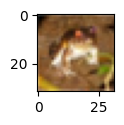

In [13]:
plt.figure(figsize=(10,1))
plt.imshow(xtrain[0])

In [14]:
classes=["airplan","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [15]:
xtrainscaled=xtrain/255
xtestscaled=xtest/255

In [20]:
ytraincat=keras.utils.to_categorical(ytrain,num_classes=10)
ytraincat[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [21]:
ytestcat=keras.utils.to_categorical(ytest,num_classes=10)
ytestcat[0:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [23]:
ytrain[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),

    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')






])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(xtrainscaled,ytraincat,epochs=50)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 131s 83ms/step - accuracy: 0.3050 - loss: 1.9293
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 79ms/step - accuracy: 0.4194 - loss: 1.6461
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 79ms/step - accuracy: 0.4535 - loss: 1.5527
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.4764 - loss: 1.4848
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 83ms/step - accuracy: 0.4956 - loss: 1.4340
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 79ms/step - accuracy: 0.5101 - loss: 1.3904
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.5281 - loss: 1.3516
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 124s 80ms/step - accuracy: 0.5372 - loss: 1.3192
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.5444 - loss: 1.2950
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 142s 79ms/step - accuracy: 0.5596 - loss: 1.2530
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 80ms/step - accuracy: 0.5720 - loss: 1.21

In [32]:
model.predict(xtestscaled)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


array([1.5561722e-01, 4.6533716e-01, 8.6703229e-01, 9.9942094e-01,
       9.5644194e-01, 9.7832942e-01, 3.7275266e-03, 2.2992025e-04,
       9.2804265e-01, 1.6560921e-01], dtype=float32)

In [34]:
classes[np.argmax(model.predict(xtestscaled)[0])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


'cat'